# Athlete profiles.
### Detailed look and analysis at individual performances.

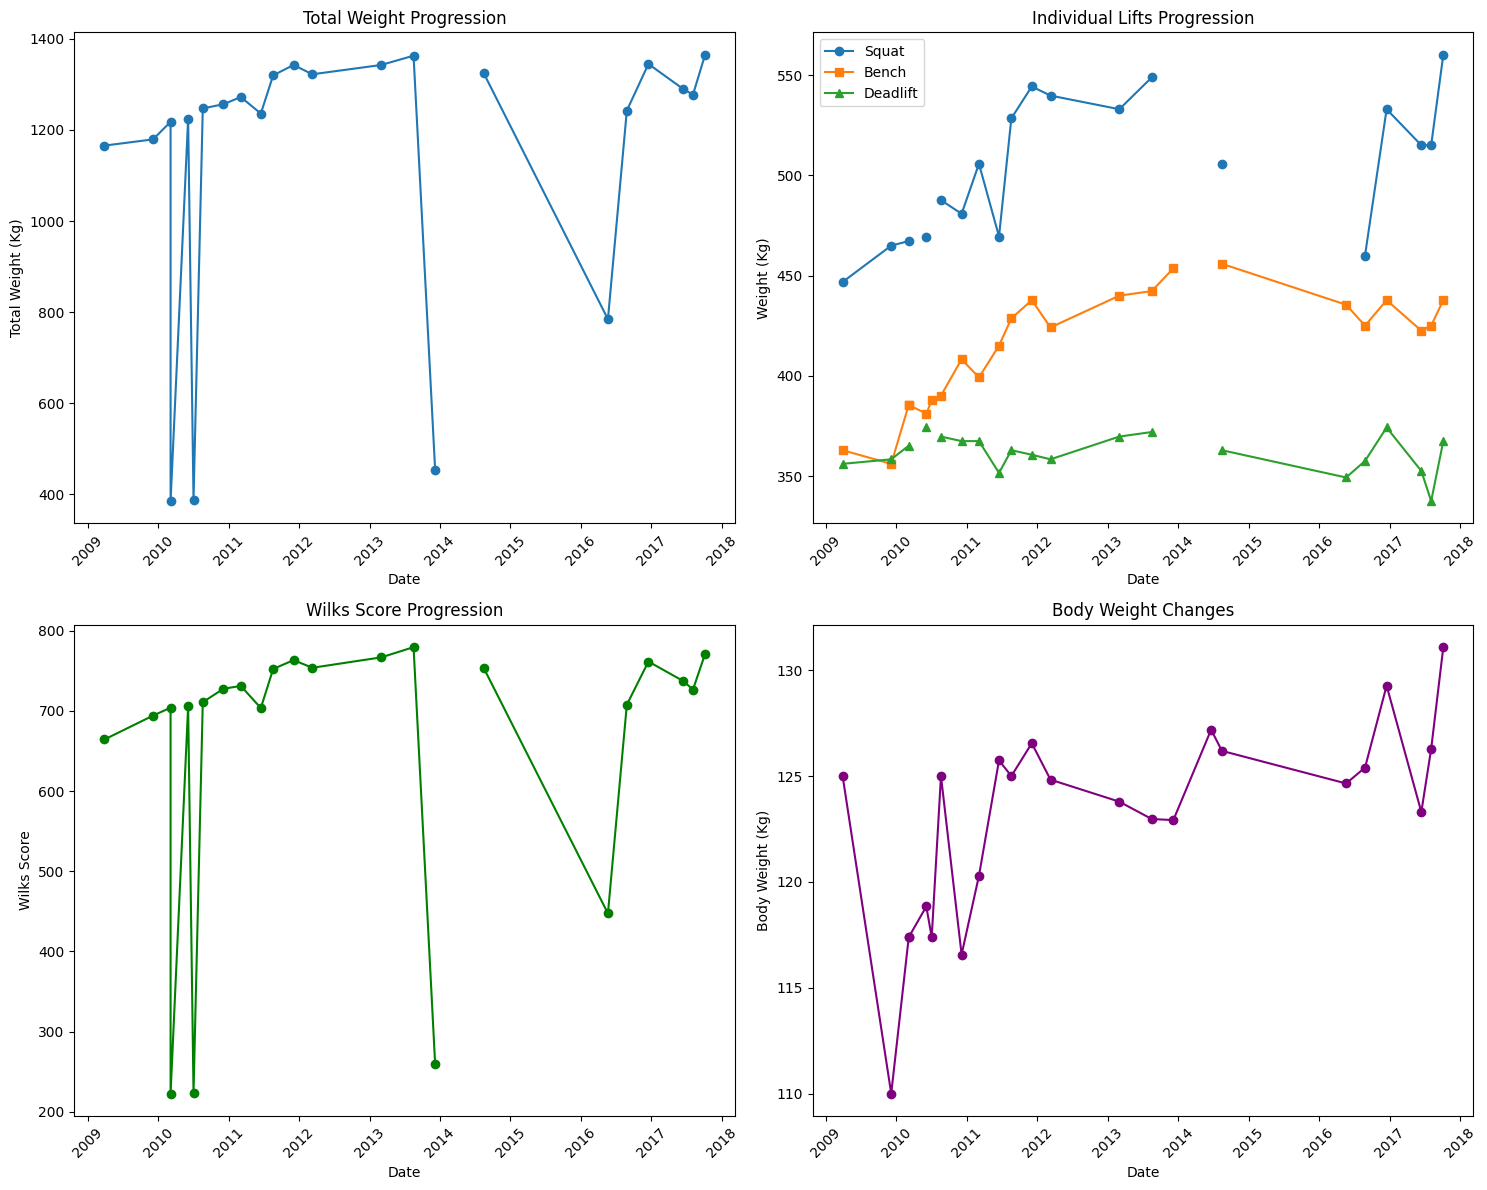

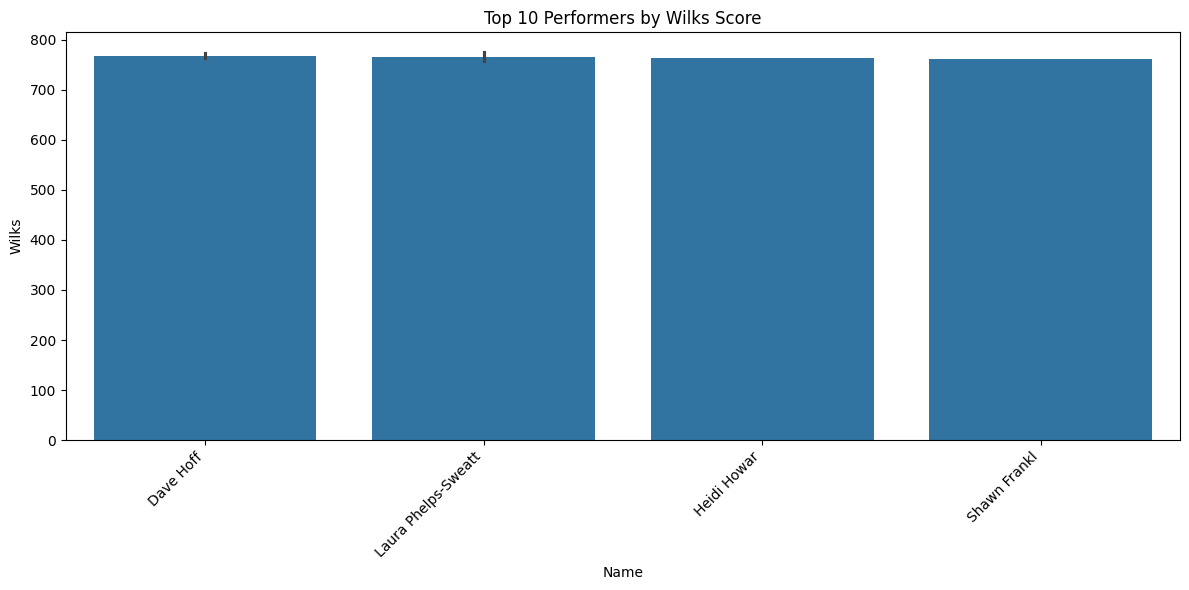

,Name,Sex,WeightClassKg,TotalKg,Wilks
53198,Dave Hoff,M,125,1363.05,779.38
162483,Laura Phelps-Sweatt,F,75,816.47,776.17
57011,Dave Hoff,M,140,1365.31,771.07
164936,Dave Hoff,M,125,1342.63,766.63
164532,Laura Phelps-Sweatt,F,75,802.86,764.83
53119,Heidi Howar,F,60,678.12,763.55
163054,Dave Hoff,M,140,1342.63,763.22
159715,Shawn Frankl,M,90,1192.95,761.57
55694,Dave Hoff,M,140,1344.90,761.44
160104,Laura Phelps-Sweatt,F,75,796.05,756.76


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_athlete_career(athlete_name):
    # Load and prepare data
    lifters_df = pd.read_csv('openpowerlifting.csv')
    meets_df = pd.read_csv('meets.csv')
    
    # Merge datasets to get dates
    combined_df = pd.merge(lifters_df, meets_df[['MeetID', 'Date']], on='MeetID')
    combined_df['Date'] = pd.to_datetime(combined_df['Date'])
    
    # Get athlete's data
    athlete_data = combined_df[combined_df['Name'] == athlete_name].sort_values('Date')
    
    if len(athlete_data) == 0:
        print(f"No data found for athlete: {athlete_name}")
        return None
    
    # Create progression plots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Total Weight Progress
    ax1.plot(athlete_data['Date'], athlete_data['TotalKg'], marker='o')
    ax1.set_title('Total Weight Progression')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Weight (Kg)')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Individual Lifts Progress
    ax2.plot(athlete_data['Date'], athlete_data['BestSquatKg'], marker='o', label='Squat')
    ax2.plot(athlete_data['Date'], athlete_data['BestBenchKg'], marker='s', label='Bench')
    ax2.plot(athlete_data['Date'], athlete_data['BestDeadliftKg'], marker='^', label='Deadlift')
    ax2.set_title('Individual Lifts Progression')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Weight (Kg)')
    ax2.legend()
    ax2.tick_params(axis='x', rotation=45)
    
    # Plot 3: Wilks Score Progress
    ax3.plot(athlete_data['Date'], athlete_data['Wilks'], marker='o', color='green')
    ax3.set_title('Wilks Score Progression')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Wilks Score')
    ax3.tick_params(axis='x', rotation=45)
    
    # Plot 4: Body Weight Changes
    ax4.plot(athlete_data['Date'], athlete_data['BodyweightKg'], marker='o', color='purple')
    ax4.set_title('Body Weight Changes')
    ax4.set_xlabel('Date')
    ax4.set_ylabel('Body Weight (Kg)')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Return athlete's statistics
    return athlete_data.describe()

def plot_top_performers(n=10):
    # Load data
    lifters_df = pd.read_csv('openpowerlifting.csv')
    
    # Get top performers
    top_lifters = lifters_df.nlargest(n, 'Wilks')
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot Wilks scores for top performers
    sns.barplot(x='Name', y='Wilks', data=top_lifters)
    plt.title(f'Top {n} Performers by Wilks Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return top_lifters[['Name', 'Sex', 'WeightClassKg', 'TotalKg', 'Wilks']]

# Example usage:
analyze_athlete_career("Dave Hoff")
plot_top_performers(10)